<a href="https://colab.research.google.com/github/eovallemagallanes/Digital-Image-Processing/blob/main/lecture12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wiener filter

$$
IOut(x) = \bar{x} + \frac{\sigma_L^2}{\sigma_L^2 + \sigma_G^2} (x - \bar{x}),
$$

where $\sigma_L^2$, and $\sigma_G^2$ are the local (patch) and global variance of the image, respectively. $\bar{x}$ is the mean intensity of the patch, and $x$ is the current intensity value at position $(i, j)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
from skimage.filters import median
from skimage.morphology import square

from scipy import signal
from sklearn.metrics import mean_squared_error
import time

In [3]:
def addpadding(img, kernel_size=3):
    h, w = img.shape
    ks2 = kernel_size//2
    img2 = np.zeros((h+2*ks2, w+2*ks2))
    img2[ks2:h+ks2,ks2:w+ks2]=img

    return img2


In [8]:
def wiener(img, kernel_size=3, central_pixel=True):
    # image shape
    h,w = img.shape

    # define kernel
    ks2= kernel_size//2
    N = kernel_size*kernel_size if central_pixel else (kernel_size*kernel_size)-1
    kernel = 1/N * np.ones((kernel_size, kernel_size))

    if not central_pixel:
        kernel[ks2, ks2] = 0
    #print(kernel)

    #img_mean = signal.convolve2d(img, kernel, mode='same')

    #get global variance
    varG = img.var()

    #add padding to the image
    img2 = addpadding(img, kernel_size)
    imgOut = np.zeros_like(img)

    
    for i in range(ks2, h-ks2+1):
        for j in range(ks2, w-ks2+1):
            patch = np.array(img2[i-ks2:i+ks2+1, j-ks2:j+ks2+1])
            meanL = patch.mean() #img_mean[i-ks2, j-ks2]
            #get local variance
            varL = patch.var()
            imgOut[i-ks2, j-ks2] = meanL + ((varL**2)/(varL + varG)*(img2[i,j] - meanL))

    return imgOut


In [11]:
skimage.util.random_noise

# working in range [0.0, 255.0]
img = skimage.img_as_float(skid.chelsea()) #*255.0

# convert to gray-scale image
gray_img = skic.rgb2gray(img)

# add s&p noise
noise_img = sku.random_noise(gray_img, 's&p', salt_vs_pepper=0.2, amount=0.1)

In [12]:
start = time.time()
imgWiener = wiener(noise_img, kernel_size=3, central_pixel=False)
end = time.time()

print('time wiener filter: ', end - start, '(s)')

time wiener filter:  5.794825315475464 (s)


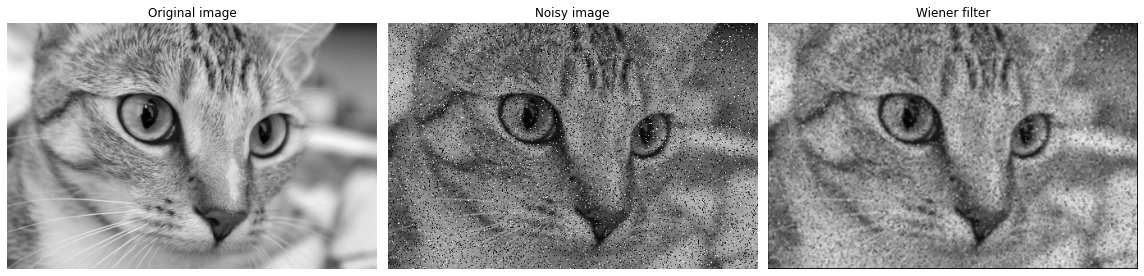

In [13]:
ig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 16))
ax = axes.ravel()
ax[0].imshow(gray_img, cmap='gray')
ax[0].set_title("Original image")
ax[1].imshow(noise_img, cmap='gray')
ax[1].set_title("Noisy image")
ax[2].imshow(imgWiener, cmap='gray')
ax[2].set_title("Wiener filter")

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()